# GaussianMixtureBinning: Feature Demonstration

This notebook demonstrates the key features of the `GaussianMixtureBinning` class from the binlearn library.

## Key Features Covered:
- Basic binning with different configurations
- Working with pandas DataFrames and numpy arrays
- Sklearn pipeline integration
- Parameter serialization and reconstruction
- Edge case handling

## Overview
`GaussianMixtureBinning` uses Gaussian Mixture Models (GMM) to create probabilistically-informed bins, making it ideal for:
- **Complex multi-modal distributions**
- **Probabilistic bin boundaries**
- **Overlapping cluster patterns**
- **Soft clustering with uncertainty modeling**

## 1. Setup and Data Preparation

In [17]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from binlearn.methods import GaussianMixtureBinning, KMeansBinning, EqualWidthBinning
import warnings
warnings.filterwarnings('ignore')

# Set random seed
np.random.seed(42)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [18]:
# Create sample datasets emphasizing GaussianMixtureBinning strengths
n_samples = 300

# 1. Pandas DataFrame with overlapping Gaussian distributions
# Create overlapping clusters where GMM excels
data = pd.DataFrame({
    'overlapping': np.concatenate([
        np.random.normal(20, 8, n_samples//3),   # Wide overlap
        np.random.normal(35, 6, n_samples//3),   # Medium overlap
        np.random.normal(50, 7, n_samples//3)    # Wide overlap
    ]),
    'complex_mixture': np.concatenate([
        np.random.normal(10, 3, n_samples//4),
        np.random.normal(25, 5, n_samples//4),
        np.random.normal(45, 4, n_samples//4),
        np.random.normal(70, 6, n_samples//4)
    ]),
    'probabilistic': np.concatenate([
        np.random.normal(15, 4, n_samples//2),
        np.random.normal(55, 8, n_samples//2)
    ])
})

# 2. NumPy array with soft boundaries
# Create overlapping multivariate Gaussians
cluster1 = np.random.multivariate_normal([15, 25], [[16, 4], [4, 9]], n_samples//3)
cluster2 = np.random.multivariate_normal([35, 20], [[12, -3], [-3, 16]], n_samples//3)
cluster3 = np.random.multivariate_normal([25, 45], [[20, 8], [8, 12]], n_samples//3)
array_data = np.vstack([cluster1, cluster2, cluster3])

# 3. Classification dataset with probabilistic structure
X_class, y_class = make_classification(
    n_samples=n_samples, 
    n_features=4, 
    n_informative=3, 
    n_redundant=1, 
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=3,  # Multiple overlapping clusters
    class_sep=0.6,           # Some overlap between classes
    random_state=42
)
X_features = pd.DataFrame(X_class, columns=['feature_1', 'feature_2', 'feature_3', 'feature_4'])

print(f"📊 Created datasets:")
print(f"   - Overlapping Gaussians: {data.shape}")
print(f"   - Soft boundary array: {array_data.shape}")
print(f"   - Probabilistic classification: {X_features.shape}")
print("\n📈 Data preview (note overlapping patterns):")
print(data.describe().round(2))
print("\n📊 Distribution characteristics:")
for col in data.columns:
    print(f"   {col}: Overlapping Gaussians with soft boundaries")

📊 Created datasets:
   - Overlapping Gaussians: (300, 3)
   - Soft boundary array: (300, 2)
   - Probabilistic classification: (300, 4)

📈 Data preview (note overlapping patterns):
       overlapping  complex_mixture  probabilistic
count       300.00           300.00         300.00
mean         34.92            37.33          35.73
std          14.53            22.64          21.78
min          -0.96             5.66           4.21
25%          23.37            14.77          14.86
50%          35.39            35.87          33.50
75%          46.23            55.56          56.35
max          76.97            83.62          76.06

📊 Distribution characteristics:
   overlapping: Overlapping Gaussians with soft boundaries
   complex_mixture: Overlapping Gaussians with soft boundaries
   probabilistic: Overlapping Gaussians with soft boundaries


## 2. Basic Binning Operations

In [19]:
# Basic usage with different component counts
print("🎯 Basic GaussianMixtureBinning Demonstration")
print("=" * 45)

# Test with different component configurations
for n_components in [3, 5, 7]:
    print(f"\n📊 Using {n_components} components:")
    
    # Create and fit binner
    binner = GaussianMixtureBinning(n_components=n_components, random_state=42)
    binner.fit(data[['overlapping', 'complex_mixture']])
    
    # Transform data
    binned = binner.transform(data[['overlapping', 'complex_mixture']])
    
    print(f"   Bin edges (overlapping): {np.round(binner.bin_edges_['overlapping'], 1)}")
    print(f"   Bin edges (complex_mixture): {np.round(binner.bin_edges_['complex_mixture'], 1)}")
    
    # Check GMM components (if available)
    if hasattr(binner, 'gmm_models_'):
        print(f"   GMM components fitted: {len(binner.gmm_models_)}")
        print(f"   Probabilistic boundaries learned")
    
    print(f"   Unique bins created: {len(np.unique(binned))}")

# Demonstrate with numpy arrays
print(f"\n🔢 NumPy Array Support:")
binner_array = GaussianMixtureBinning(n_components=4, random_state=42)
binner_array.fit(array_data)
binned_array = binner_array.transform(array_data)
print(f"   Array shape: {array_data.shape} → {binned_array.shape}")
print(f"   Unique values: {len(np.unique(binned_array))}")
print(f"   Probabilistic binning with soft cluster boundaries")

🎯 Basic GaussianMixtureBinning Demonstration

📊 Using 3 components:
   Bin edges (overlapping): [-1.  26.  42.4 77. ]
   Bin edges (complex_mixture): [ 5.7 29.4 56.3 83.6]
   Unique bins created: 3

📊 Using 5 components:
   Bin edges (overlapping): [-1.  21.7 32.1 41.6 50.3 77. ]
   Bin edges (complex_mixture): [ 5.7 16.  25.7 37.1 56.8 83.6]
   Unique bins created: 5

📊 Using 7 components:
   Bin edges (overlapping): [-1.  13.4 22.7 32.1 41.1 49.7 58.4 77. ]
   Bin edges (complex_mixture): [ 5.7 14.2 21.8 28.7 38.1 55.1 69.  83.6]
   Unique bins created: 7

🔢 NumPy Array Support:
   Array shape: (300, 2) → (300, 2)
   Unique values: 4
   Probabilistic binning with soft cluster boundaries


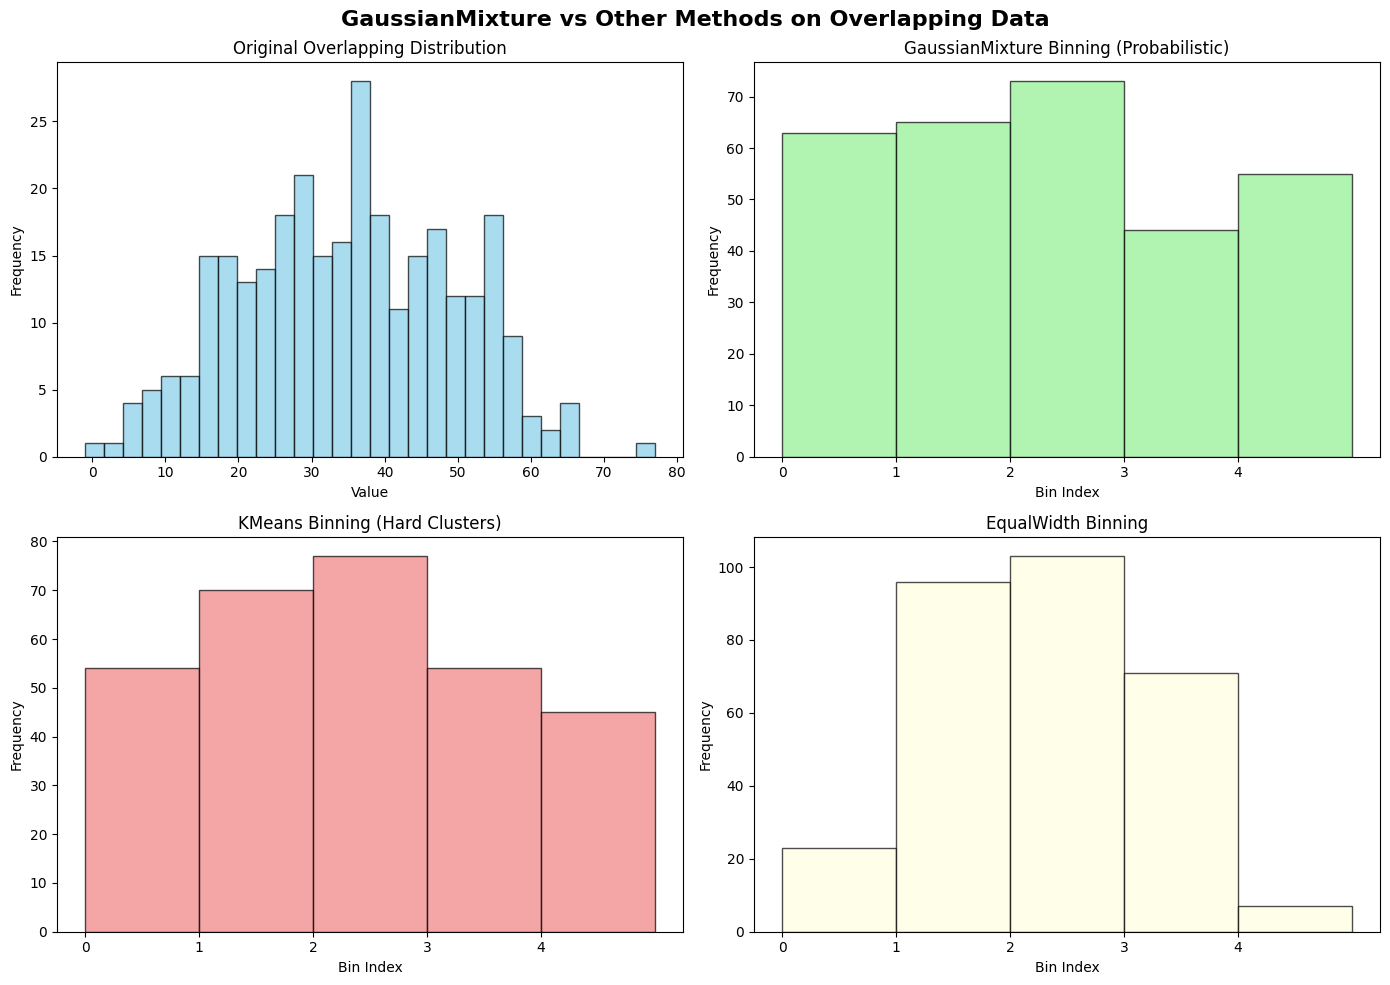


📊 Frequency distribution comparison:
GaussianMixture: [63 65 73 44 55] (std: 9.8)
KMeans:         [54 70 77 54 45] (std: 11.7)
EqualWidth:     [ 23  96 103  71   7] (std: 38.6)

💡 GMM captures probabilistic structure in overlapping data!


In [20]:
# Visualize binning results and compare with other methods
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('GaussianMixture vs Other Methods on Overlapping Data', fontsize=16, fontweight='bold')

# Original data
axes[0, 0].hist(data['overlapping'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Original Overlapping Distribution')
axes[0, 0].set_xlabel('Value')
axes[0, 0].set_ylabel('Frequency')

# GaussianMixture binning
gmm_binner = GaussianMixtureBinning(n_components=5, random_state=42)
gmm_binner.fit(data[['overlapping']])
gmm_binned = gmm_binner.transform(data[['overlapping']])

axes[0, 1].hist(gmm_binned[:, 0], bins=range(6), alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('GaussianMixture Binning (Probabilistic)')
axes[0, 1].set_xlabel('Bin Index')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_xticks(range(5))

# KMeans comparison
kmeans_binner = KMeansBinning(n_bins=5)
kmeans_binner.fit(data[['overlapping']])
kmeans_binned = kmeans_binner.transform(data[['overlapping']])

axes[1, 0].hist(kmeans_binned[:, 0], bins=range(6), alpha=0.7, color='lightcoral', edgecolor='black')
axes[1, 0].set_title('KMeans Binning (Hard Clusters)')
axes[1, 0].set_xlabel('Bin Index')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_xticks(range(5))

# EqualWidth comparison
width_binner = EqualWidthBinning(n_bins=5)
width_binner.fit(data[['overlapping']])
width_binned = width_binner.transform(data[['overlapping']])

axes[1, 1].hist(width_binned[:, 0], bins=range(6), alpha=0.7, color='lightyellow', edgecolor='black')
axes[1, 1].set_title('EqualWidth Binning')
axes[1, 1].set_xlabel('Bin Index')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_xticks(range(5))

plt.tight_layout()
plt.show()

# Compare frequency distributions
print("\n📊 Frequency distribution comparison:")
gmm_unique, gmm_counts = np.unique(gmm_binned[:, 0], return_counts=True)
kmeans_unique, kmeans_counts = np.unique(kmeans_binned[:, 0], return_counts=True)
width_unique, width_counts = np.unique(width_binned[:, 0], return_counts=True)

print(f"GaussianMixture: {gmm_counts} (std: {np.std(gmm_counts):.1f})")
print(f"KMeans:         {kmeans_counts} (std: {np.std(kmeans_counts):.1f})")
print(f"EqualWidth:     {width_counts} (std: {np.std(width_counts):.1f})")
print(f"\n💡 GMM captures probabilistic structure in overlapping data!")

## 3. Sklearn Pipeline Integration

In [21]:
# Demonstrate pipeline integration
print("🔗 Sklearn Pipeline Integration")
print("=" * 35)

# Split data for classification
X_train, X_test, y_train, y_test = train_test_split(
    X_features, y_class, test_size=0.3, random_state=42
)

# Create pipeline with GMM binning and classification
pipeline = Pipeline([
    ('binner', GaussianMixtureBinning(n_components=6, random_state=42)),
    ('classifier', RandomForestClassifier(n_estimators=50, random_state=42))
])

# Fit and evaluate
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy = (y_pred == y_test).mean()

print(f"✅ Pipeline trained successfully")
print(f"📊 Test accuracy: {accuracy:.3f}")
print(f"🔢 Features binned: {X_train.shape[1]}")

# Show bin edges from pipeline
binner_from_pipeline = pipeline.named_steps['binner']
print(f"\n📏 Probabilistic bin edges created:")
for i, (col, edges) in enumerate(binner_from_pipeline.bin_edges_.items()):
    print(f"   {col}: {np.round(edges, 2)}")

# Compare with other binning methods in pipelines
print(f"\n⚖️ Pipeline comparison:")

# KMeans pipeline
pipeline_kmeans = Pipeline([
    ('binner', KMeansBinning(n_bins=6)),
    ('classifier', RandomForestClassifier(n_estimators=50, random_state=42))
])
pipeline_kmeans.fit(X_train, y_train)
accuracy_kmeans = (pipeline_kmeans.predict(X_test) == y_test).mean()

# EqualWidth pipeline
pipeline_width = Pipeline([
    ('binner', EqualWidthBinning(n_bins=6)),
    ('classifier', RandomForestClassifier(n_estimators=50, random_state=42))
])
pipeline_width.fit(X_train, y_train)
accuracy_width = (pipeline_width.predict(X_test) == y_test).mean()

print(f"   GaussianMixture: {accuracy:.3f}")
print(f"   KMeans:         {accuracy_kmeans:.3f}")
print(f"   EqualWidth:     {accuracy_width:.3f}")
print(f"\n💡 Probabilistic binning handles complex distributions well!")

🔗 Sklearn Pipeline Integration
✅ Pipeline trained successfully
📊 Test accuracy: 0.744
🔢 Features binned: 4

📏 Probabilistic bin edges created:
   feature_1: [-2.92 -1.72 -0.81 -0.1   0.92  2.4   4.27]
   feature_2: [-3.42 -2.23 -1.4  -0.56  0.31  1.27  3.1 ]
   feature_3: [-3.87 -1.36 -0.56 -0.01  0.61  1.42  2.47]
   feature_4: [-3.17 -1.93 -0.86 -0.09  0.55  1.46  2.74]

⚖️ Pipeline comparison:
   GaussianMixture: 0.744
   KMeans:         0.778
   EqualWidth:     0.778

💡 Probabilistic binning handles complex distributions well!


## 4. Parameter Serialization and Reconstruction

In [22]:
# Demonstrate serialization for model persistence
print("💾 Parameter Serialization & Reconstruction")
print("=" * 45)

# Create and fit original binner
original_binner = GaussianMixtureBinning(n_components=5, random_state=42)
original_binner.fit(data)
original_result = original_binner.transform(data)

# Serialize parameters
params = original_binner.get_params()
print(f"📋 Serialized parameters: {params}")

# Reconstruct binner from parameters
reconstructed_binner = GaussianMixtureBinning(**params)

# Test reconstruction
reconstructed_result = reconstructed_binner.transform(data)
results_match = np.allclose(original_result, reconstructed_result)

print(f"\n🔍 Reconstruction verification:")
print(f"   ✅ Results identical: {results_match}")
print(f"   📊 Original shape: {original_result.shape}")
print(f"   📊 Reconstructed shape: {reconstructed_result.shape}")

# Test with new overlapping data
test_data = pd.DataFrame({
    'overlapping': np.concatenate([
        np.random.normal(18, 7, 30),
        np.random.normal(38, 5, 30),
        np.random.normal(52, 8, 30)
    ]),
    'complex_mixture': np.concatenate([
        np.random.normal(12, 4, 23),
        np.random.normal(28, 6, 23),
        np.random.normal(48, 5, 22),
        np.random.normal(68, 7, 22)
    ]),
    'probabilistic': np.concatenate([
        np.random.normal(17, 5, 45),
        np.random.normal(53, 9, 45)
    ])
})

test_result = reconstructed_binner.transform(test_data)
print(f"\n🔄 Transform new data without refitting:")
print(f"   ✅ Success: {test_result.shape}")
print(f"   🔢 Unique bins: {len(np.unique(test_result))}")
print(f"   🎯 Maintains learned probabilistic boundaries")

💾 Parameter Serialization & Reconstruction
📋 Serialized parameters: {'n_components': 5, 'random_state': 42, 'clip': True, 'preserve_dataframe': False, 'fit_jointly': False, 'bin_edges': {'overlapping': [-0.957960832717955, 21.706735092521527, 32.08070291679891, 41.64680042123368, 50.306630069619004, 76.96912043458305], 'complex_mixture': [5.655746975508028, 16.031121219913345, 25.722632489838368, 37.080946701845946, 56.818313939192514, 83.62415714682638], 'probabilistic': [4.212453428233713, 14.953961078407866, 33.57926189522636, 53.746325229243496, 61.75419608879163, 76.05905651869912]}, 'bin_representatives': {'overlapping': [16.043085382007746, 27.370384803035307, 36.79102103056252, 46.50257981190484, 54.11068032733318], 'complex_mixture': [10.406283784289982, 21.65595865553671, 29.78930632414003, 44.37258707955186, 69.26404079883316], 'probabilistic': [12.367766720225383, 17.54015543659035, 49.61836835386237, 57.87428210462462, 65.63411007295865]}, 'class_': 'GaussianMixtureBinning

## 5. Edge Cases and Robustness

In [23]:
# Test edge cases
print("⚠️ Edge Case Testing")
print("=" * 25)

edge_cases = {
    'Single Gaussian': np.random.normal(50, 10, 100),     # One component
    'Widely separated': np.concatenate([                   # No overlap
        np.random.normal(10, 2, 50), 
        np.random.normal(90, 2, 50)
    ]),
    'Heavy overlap': np.concatenate([                      # Strong overlap
        np.random.normal(40, 8, 50),
        np.random.normal(50, 8, 50)
    ]),
    'Small dataset': np.concatenate([                      # Limited data
        np.random.normal(20, 3, 8), 
        np.random.normal(60, 4, 7)
    ])
}

for case_name, case_data in edge_cases.items():
    print(f"\n🧪 Testing: {case_name}")
    try:
        df_case = pd.DataFrame({'values': case_data})
        binner = GaussianMixtureBinning(n_components=4, random_state=42)
        binner.fit(df_case)
        result = binner.transform(df_case)
        
        unique_bins, counts = np.unique(result, return_counts=True)
        
        print(f"   ✅ Success: {result.shape}")
        print(f"   📊 Unique bins: {len(unique_bins)}")
        print(f"   📈 Frequencies: {counts} (std: {np.std(counts):.1f})")
        print(f"   📏 Range: [{case_data.min():.1f}, {case_data.max():.1f}]")
        
        if case_name == 'Heavy overlap':
            print(f"   💡 GMM handles overlapping Gaussians well!")
        elif case_name == 'Single Gaussian':
            print(f"   💡 Adapts to single-component case")
            
    except Exception as e:
        print(f"   ❌ Failed: {str(e)}")

# Test performance on different distribution types
print(f"\n📊 Distribution Adaptability Test:")
distributions = {
    'Overlapping Gaussians': np.concatenate([
        np.random.normal(30, 8, 50), 
        np.random.normal(40, 8, 50)
    ]),
    'Multi-modal': np.concatenate([
        np.random.normal(20, 3, 33), 
        np.random.normal(50, 4, 34), 
        np.random.normal(80, 3, 33)
    ]),
    'Single mode': np.random.normal(50, 15, 100),
    'Mixed variances': np.concatenate([
        np.random.normal(25, 2, 50),   # Tight
        np.random.normal(75, 12, 50)   # Wide
    ])
}

for dist_name, dist_data in distributions.items():
    df_dist = pd.DataFrame({'values': dist_data})
    
    # GaussianMixture
    gmm_binner = GaussianMixtureBinning(n_components=5, random_state=42)
    gmm_result = gmm_binner.fit_transform(df_dist)
    gmm_unique, gmm_counts = np.unique(gmm_result, return_counts=True)
    
    # KMeans for comparison
    kmeans_binner = KMeansBinning(n_bins=5)
    kmeans_result = kmeans_binner.fit_transform(df_dist)
    kmeans_unique, kmeans_counts = np.unique(kmeans_result, return_counts=True)
    
    print(f"\n{dist_name} distribution:")
    print(f"   GaussianMixture: {gmm_counts} (std: {np.std(gmm_counts):.1f})")
    print(f"   KMeans:         {kmeans_counts} (std: {np.std(kmeans_counts):.1f})")
    
    if 'Overlapping' in dist_name or 'Mixed' in dist_name:
        print(f"   💡 GMM excels with probabilistic/overlapping patterns!")
    elif 'Single' in dist_name:
        print(f"   ⚖️ Similar performance for single-mode data")

⚠️ Edge Case Testing

🧪 Testing: Single Gaussian
   ✅ Success: (100, 1)
   📊 Unique bins: 4
   📈 Frequencies: [14 24 39 23] (std: 9.0)
   📏 Range: [28.5, 69.0]
   💡 Adapts to single-component case

🧪 Testing: Widely separated


   ✅ Success: (100, 1)
   📊 Unique bins: 4
   📈 Frequencies: [32 18 33 17] (std: 7.5)
   📏 Range: [6.4, 96.3]

🧪 Testing: Heavy overlap
   ✅ Success: (100, 1)
   📊 Unique bins: 4
   📈 Frequencies: [ 8 24 43 25] (std: 12.4)
   📏 Range: [16.5, 72.1]
   💡 GMM handles overlapping Gaussians well!

🧪 Testing: Small dataset
   ✅ Success: (15, 1)
   📊 Unique bins: 4
   📈 Frequencies: [4 4 2 5] (std: 1.1)
   📏 Range: [18.1, 62.4]

📊 Distribution Adaptability Test:

Overlapping Gaussians distribution:
   GaussianMixture: [13 24 26 26 11] (std: 6.6)
   KMeans:         [13 24 26 26 11] (std: 6.6)
   💡 GMM excels with probabilistic/overlapping patterns!

Multi-modal distribution:
   GaussianMixture: [33 20 14 16 17] (std: 6.8)
   KMeans:         [33 20 14 16 17] (std: 6.8)

Single mode distribution:
   GaussianMixture: [18 28 35 13  6] (std: 10.4)
   KMeans:         [19 28 36 16  1] (std: 11.8)
   ⚖️ Similar performance for single-mode data

Mixed variances distribution:
   GaussianMixture: [50  5 

## 6. Summary and Best Practices

In [24]:
# Summary and recommendations
print("📝 GaussianMixtureBinning Summary")
print("=" * 40)

recommendations = {
    "✅ Best for": [
        "Overlapping Gaussian distributions",
        "Complex probabilistic mixture models",
        "Data with soft cluster boundaries",
        "When uncertainty modeling is important",
        "Mixed variance components"
    ],
    "⚠️ Use with caution": [
        "Non-Gaussian distributions (exponential, uniform)",
        "Very small datasets (insufficient for GMM fitting)",
        "When hard boundaries are required",
        "Computational efficiency is critical"
    ],
    "💡 Tips": [
        "Set random_state for reproducible results",
        "Choose n_components based on expected modes",
        "Consider covariance_type parameter for flexibility",
        "Validate GMM assumptions with your data",
        "Compare with KMeans for hard clustering scenarios"
    ]
}

for category, items in recommendations.items():
    print(f"\n{category}:")
    for item in items:
        print(f"  • {item}")

print(f"\n🎯 Key Features Demonstrated:")
features = [
    "Probabilistic binning using Gaussian Mixture Models",
    "Superior handling of overlapping distributions",
    "Soft cluster boundaries with uncertainty modeling",
    "Seamless sklearn pipeline integration",
    "Parameter serialization with GMM preservation",
    "Adaptability to complex mixture patterns"
]

for i, feature in enumerate(features, 1):
    print(f"  {i}. {feature}")

print(f"\n🔍 When to Choose GaussianMixtureBinning:")
decision_points = [
    "✅ Data follows mixture of Gaussian distributions",
    "✅ Clusters have overlapping boundaries",
    "✅ You need probabilistic uncertainty estimates",
    "✅ Different components have varying spreads",
    "❌ Data is uniformly or exponentially distributed",
    "❌ You need simple, interpretable boundaries",
    "❌ Dataset is too small for reliable GMM fitting",
    "❌ Hard cluster assignments are required"
]

for point in decision_points:
    print(f"  {point}")

print(f"\n✨ GaussianMixtureBinning demonstration complete!")
print(f"🎯 Perfect for probabilistic modeling of complex overlapping patterns!")

📝 GaussianMixtureBinning Summary

✅ Best for:
  • Overlapping Gaussian distributions
  • Complex probabilistic mixture models
  • Data with soft cluster boundaries
  • When uncertainty modeling is important
  • Mixed variance components

⚠️ Use with caution:
  • Non-Gaussian distributions (exponential, uniform)
  • Very small datasets (insufficient for GMM fitting)
  • When hard boundaries are required
  • Computational efficiency is critical

💡 Tips:
  • Set random_state for reproducible results
  • Choose n_components based on expected modes
  • Consider covariance_type parameter for flexibility
  • Validate GMM assumptions with your data
  • Compare with KMeans for hard clustering scenarios

🎯 Key Features Demonstrated:
  1. Probabilistic binning using Gaussian Mixture Models
  2. Superior handling of overlapping distributions
  3. Soft cluster boundaries with uncertainty modeling
  4. Seamless sklearn pipeline integration
  5. Parameter serialization with GMM preservation
  6. Adap